In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
trips_data = pd.read_excel('c:/Users/Serge/Downloads/trips_data.xlsx', index_col=0)

In [38]:
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [39]:
trips_data.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


<AxesSubplot:>

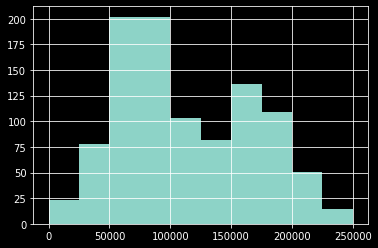

In [40]:
trips_data.salary.hist()

<AxesSubplot:>

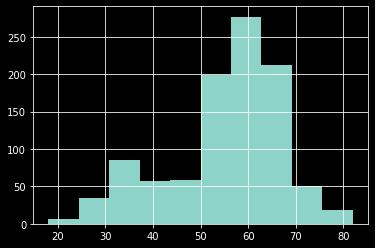

In [41]:
trips_data.age.hist()

<AxesSubplot:>

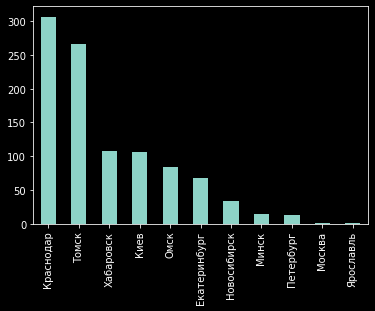

In [42]:
trips_data.city.value_counts().plot(kind='bar')

<AxesSubplot:>

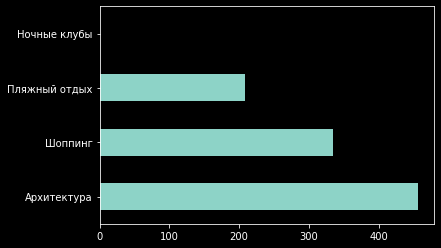

In [43]:
trips_data.vacation_preference.value_counts().plot(kind='barh')

<AxesSubplot:>

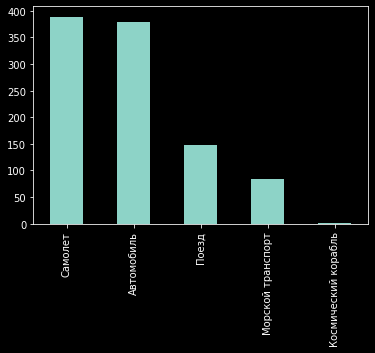

In [44]:
trips_data.transport_preference.value_counts().plot(kind='bar')

In [45]:
trips_data.age.mean()

55.209

In [46]:
trips_data.age.sum()

55209

In [47]:
trips_data.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Москва            1
Ярославль         1
Name: city, dtype: int64

In [48]:
final_data = pd.get_dummies(trips_data, columns=['city', 'vacation_preference', 'transport_preference'])
final_data

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81000,55,2,Paris,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
996,96000,32,1,Paris,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
997,56000,68,2,Paris,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
998,162000,69,0,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [49]:
X = final_data.drop('target', axis=1)
y = final_data.target

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
y.value_counts()

Paris       203
New York    201
Tokio       199
London      199
Sydney      198
Name: target, dtype: int64

In [89]:
forest = RandomForestClassifier(max_depth=2, random_state=42)

In [90]:
forest.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier()

In [55]:
CB.fit(X, y)

614:	learn: 0.0904299	total: 4.74s	remaining: 2.97s
615:	learn: 0.0902908	total: 4.75s	remaining: 2.96s
616:	learn: 0.0901381	total: 4.75s	remaining: 2.95s
617:	learn: 0.0900224	total: 4.76s	remaining: 2.94s
618:	learn: 0.0899105	total: 4.76s	remaining: 2.93s
619:	learn: 0.0897837	total: 4.77s	remaining: 2.92s
620:	learn: 0.0896140	total: 4.78s	remaining: 2.92s
621:	learn: 0.0895144	total: 4.79s	remaining: 2.91s
622:	learn: 0.0893443	total: 4.79s	remaining: 2.9s
623:	learn: 0.0892286	total: 4.8s	remaining: 2.89s
624:	learn: 0.0890871	total: 4.81s	remaining: 2.88s
625:	learn: 0.0889473	total: 4.81s	remaining: 2.88s
626:	learn: 0.0887995	total: 4.82s	remaining: 2.87s
627:	learn: 0.0886774	total: 4.83s	remaining: 2.86s
628:	learn: 0.0885484	total: 4.84s	remaining: 2.85s
629:	learn: 0.0883760	total: 4.84s	remaining: 2.84s
630:	learn: 0.0882855	total: 4.85s	remaining: 2.84s
631:	learn: 0.0881849	total: 4.86s	remaining: 2.83s
632:	learn: 0.0880956	total: 4.86s	remaining: 2.82s
633:	learn: 0.

In [56]:
X.head()

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [91]:
{col:[0] for col in X.columns}

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [92]:
example = {'age': [50],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [1],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [150000],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1]}

In [93]:
example_dataframe = pd.DataFrame(example)

In [94]:
forest.predict(example_dataframe)

array(['Paris'], dtype=object)

In [96]:
forest.predict_proba(example_dataframe)

array([[0.23362537, 0.21143213, 0.27579387, 0.15639608, 0.12275255]])

In [62]:
CB.predict(example_dataframe)

array([['Sydney']], dtype=object)

In [97]:
CB.predict_proba(example_dataframe)

array([[3.32653724e-03, 2.58750429e-03, 4.67291780e-04, 9.92010357e-01,
        1.60830931e-03]])

In [63]:
forest.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [64]:
CB.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [76]:
from sklearn.linear_model import RidgeClassifier

In [80]:
RC = RidgeClassifier()

In [81]:
RC.fit(X, y)

RidgeClassifier()

In [82]:
RC.predict(example_dataframe)

array(['New York'], dtype='<U8')

In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
MLPC = MLPClassifier()

In [85]:
MLPC.fit(X, y)

MLPClassifier()

In [86]:
MLPC.predict(example_dataframe)

array(['Tokio'], dtype='<U8')

In [99]:
MLPC.predict_proba(example_dataframe)

array([[0., 0., 0., 0., 1.]])

In [100]:
import shap

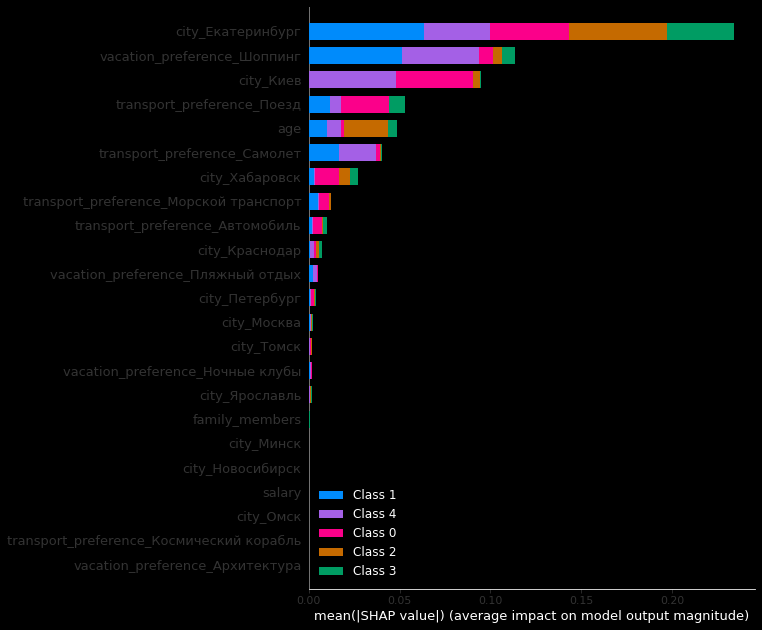

In [105]:
shap_test = shap.TreeExplainer(forest).shap_values(example_dataframe)
shap.summary_plot(shap_test, example_dataframe,
                      max_display=25, auto_size_plot=True)
